# Text Mining 

In [3]:
!pip install -U spacy

In [4]:
!python -m spacy download en

2022-01-07 19:50:56.331641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-07 19:50:56.333313: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
!pip install wordcloud

In [9]:
# Perform sentimental analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [10]:
data = pd.read_csv('Elon_musk.csv')
data

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text Preprocessing

In [15]:
data=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It�s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [17]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [19]:
#Punctuation
no_punc_text = data_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [25]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won�t give you your private keys should be avoid

In [34]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X',

In [33]:
# Tokens count
len(text_tokens)

20466

In [37]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I�m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001F923',

In [38]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it�s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923',

In [39]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it�', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'crypto',

In [41]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 i�m alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine it�s getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won�t give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [42]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'I', '�', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyew', 'geoffkeighley', 'unrealengine', 'it', '�', 's', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this',

In [43]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 I � m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyew geoffkeighley unrealengine it � s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet win � t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably we

## Feature Extaction
### 1. Using CountVectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [45]:
print(vectorizer.vocabulary_)

{'kunalb11': 2043, 'alien': 230, 'idaacarmack': 1780, 'ray': 2948, 'trace': 3820, 'cyberpunk': 962, 'hdr': 1668, 'nextlevel': 2485, 'have': 1662, 'try': 3854, 'joerogan': 1962, 'spotify': 3445, 'great': 1603, 'interview': 1890, 'gtera27': 1621, 'doge': 1113, 'underestimate': 3983, 'teslacn': 3667, 'congratulation': 855, 'tesla': 3661, 'china': 739, 'amazing': 254, 'execution': 1322, 'last': 2061, 'year': 4252, 'now': 2526, 'next': 2484, 'even': 1292, 'happy': 1649, 'new': 2481, 'ox': 2644, 'frodo': 1488, 'underdoge': 3982, 'all': 232, 'thought': 3746, 'would': 4227, 'fail': 1358, 'himself': 1714, 'owenspark': 2641, 'flcnhvy': 1430, 'anonyx10': 283, 'haha': 1635, 'thanks': 3705, 'indeed': 1829, 'tweet': 3872, 'definitely': 1016, 'represent': 3033, 'realworld': 2974, 'time': 3763, 'allocation': 234, 'the': 3712, 'entertaining': 1249, 'outcome': 2621, 'likely': 2121, 'givedirectly': 1572, 'just': 1990, 'send': 3218, 'agree': 201, 'clubhouse': 780, 'kanyew': 1999, 'geoffkeighley': 1551, 'u

In [46]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(X.toarray().shape)

(16381, 4284)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [48]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [49]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'be', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes', '

## 3. TF-IDF Vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [51]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '20', '28delayslater', '30', '60', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'definitely', 'delivery', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', 'dmcryan', 'do', 'dock', 'doesn', 'do

## Generate Word Cloud

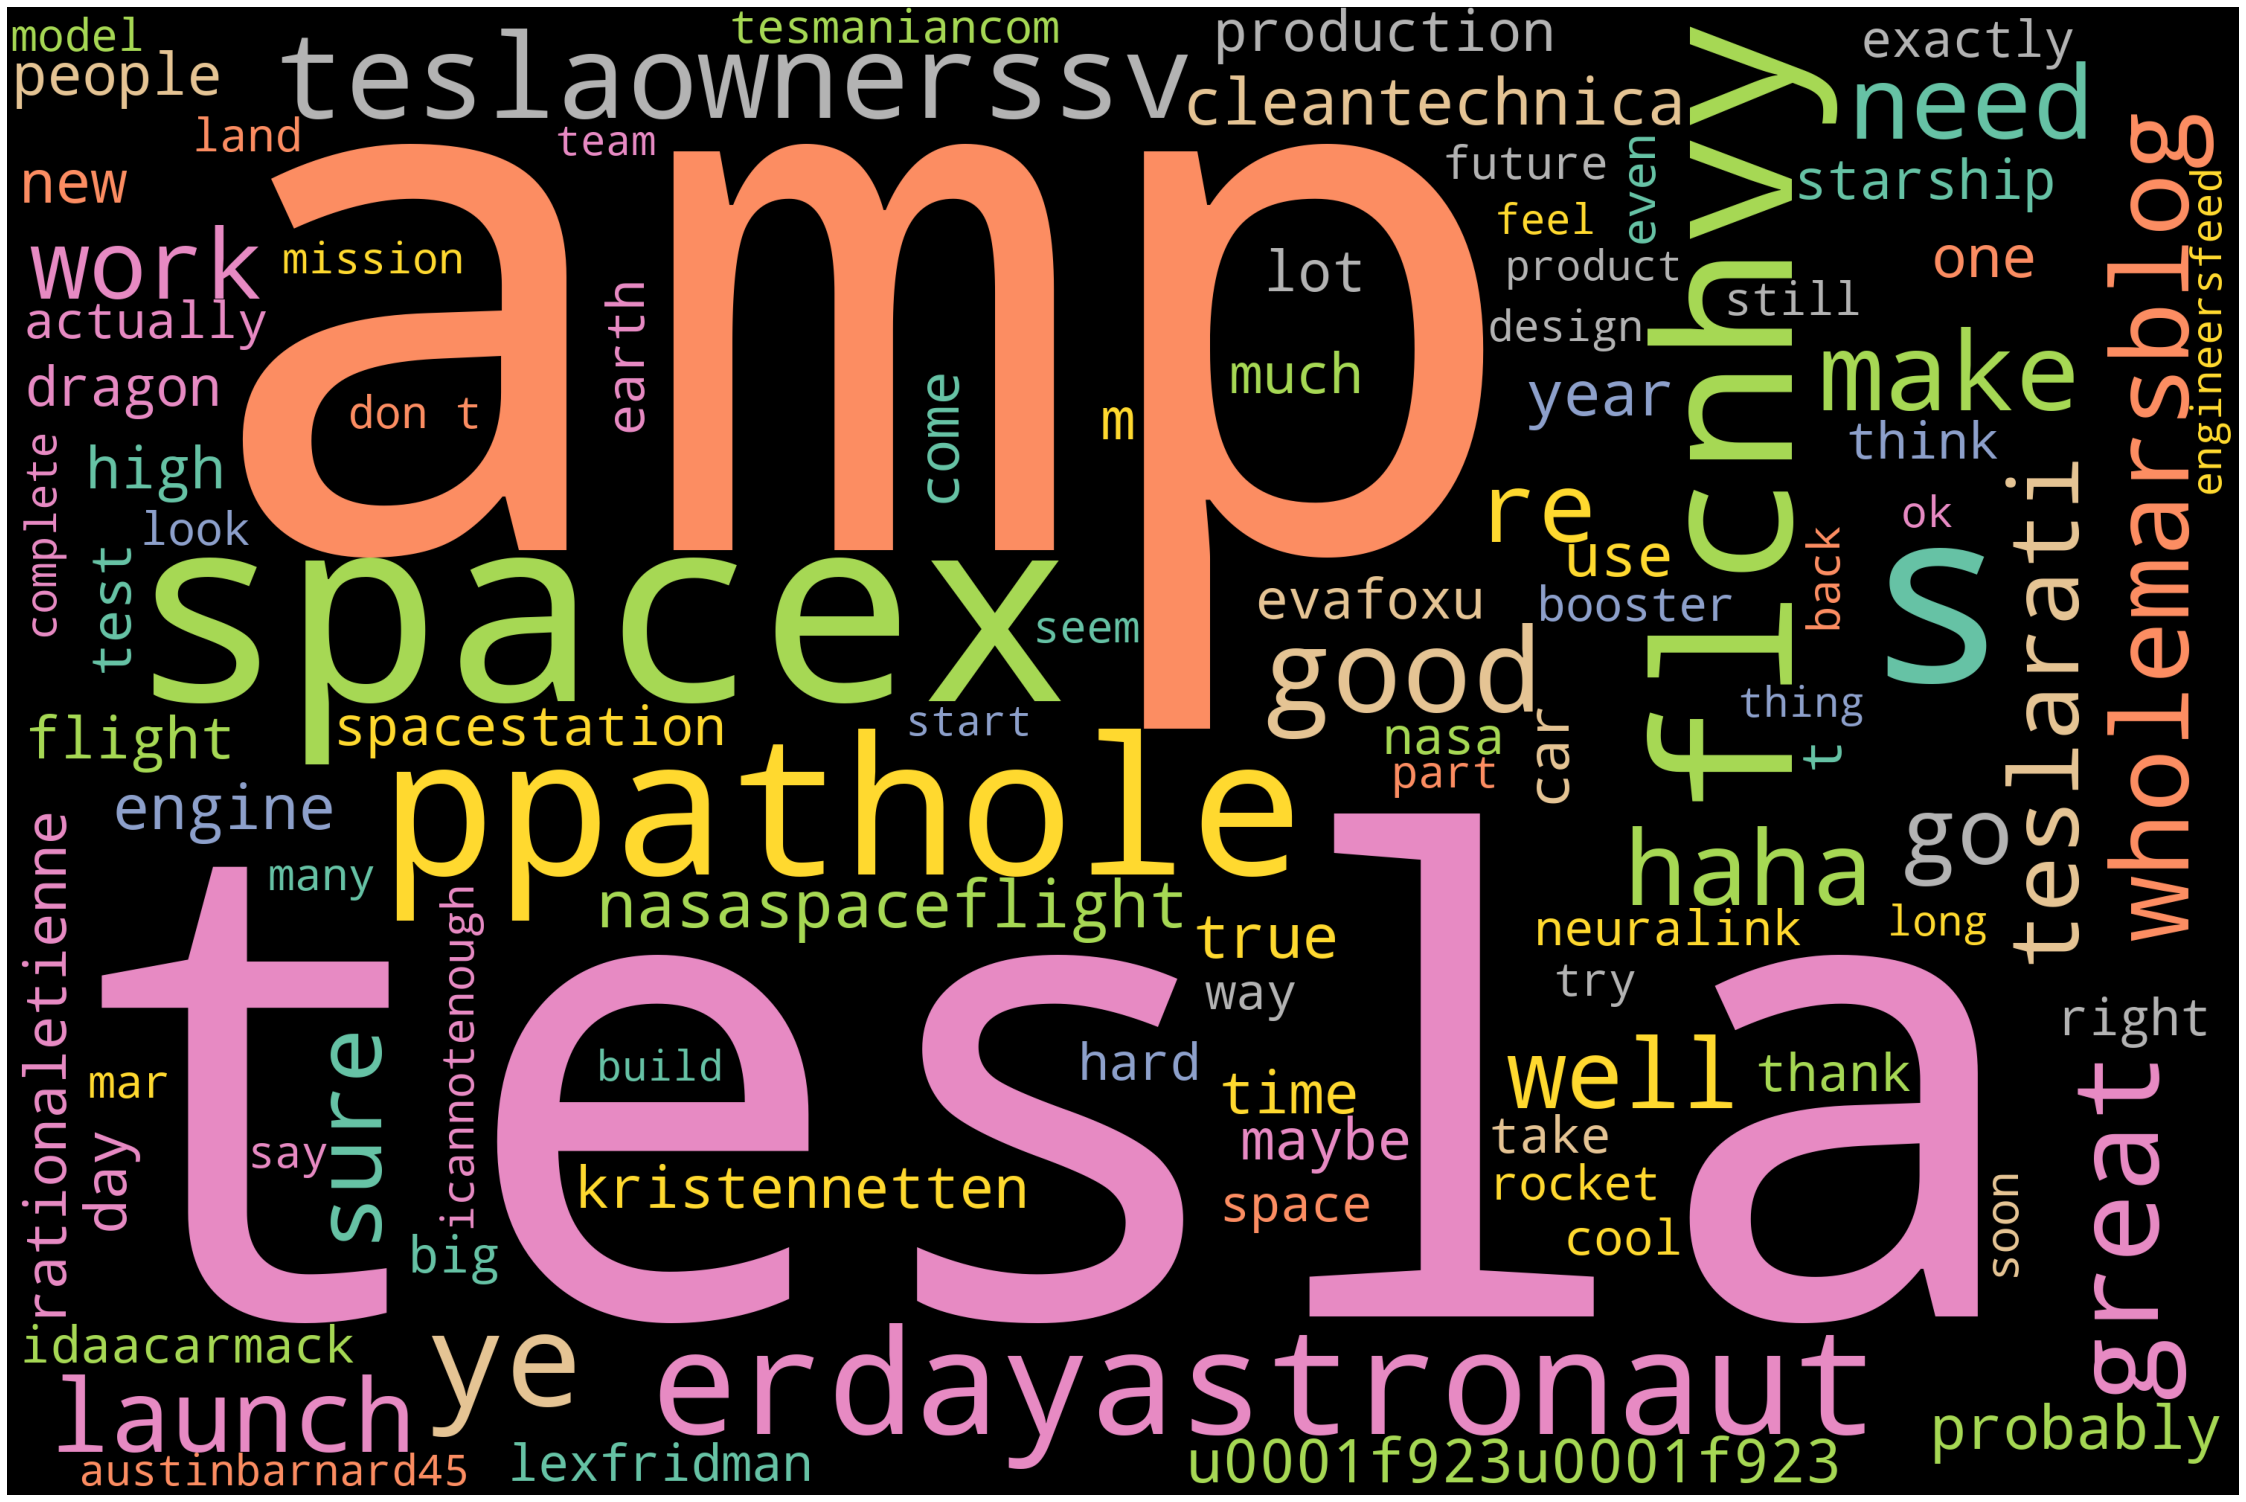

In [54]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [58]:
##Part Of Speech Tagging

nlp = spacy.load("en_core_web_sm")
one_block =clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [59]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 NOUN
I PRON
� VERB
m VERB
alien ADJ
idaacarmack PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate PROPN
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha VERB
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree ADJ
clubhouse NOUN
kanyew PROPN
geoffkeighley PROPN
unrealengine VERB
it PRON
� VERB
s PART
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x NOUN
toddler NOUN
hodler NOUN
joshmanmode NOUN
he PRON
definitely ADV
issue VE

wholemarsblog NOUN
the DET
entire ADJ
� NOUN
stack VERB
� PROPN
datum NOUN
collection NOUN
labeling PROPN
amp NOUN
inference NOUN
surround NOUN
video NOUN
th X
� PROPN
flcnhvy PROPN
wholemarsblog NOUN
yes INTJ
although SCONJ
crazy ADJ
turn VERB
fsd ADJ
wholemarsblog NOUN
tesla NOUN
steadily ADV
move VERB
nns DET
8 NUM
camera NOUN
surround NOUN
video NOUN
this PRON
enable VERB
superhuman NOUN
selfdriving NOUN
naval ADJ
some DET
tyranny NOUN
also ADV
road VERB
hell PROPN
mostly ADV
pave VERB
bad ADJ
intention NOUN
levine NOUN
catchy ADJ
megaconstellati PROPN
aviationintel PROPN
jetcitystar PROPN
you PRON
all PRON
sat VERB
launch NOUN
next ADJ
year NOUN
laser NOUN
link NOUN
only ADV
o INTJ
� PROPN
megaconstellati PROPN
aviationintel NOUN
jetcitystar PROPN
larrypress PROPN
yup NOUN
teslagong PROPN
teslaownerssv PROPN
cleantechnica PROPN
I PRON
hope VERB
tesmaniancom VERB
these DET
also ADV
laser NOUN
link NOUN
satellite NOUN
ground NOUN
station NOUN
need VERB
poles PROPN
teslaownerssv PROP

bmw PROPN
� PROPN
s PART
home NOUN
state NOUN
baveria NOUN
that PRON
� PROPN
s PART
far ADV
brande NOUN
� NOUN
tesmaniancom NOUN
this DET
sensible ADJ
opposition NOUN
anywhere ADV
mean ADJ
progress NOUN
everywhere ADV
harsimranbansal NOUN
literally ADV
tobyliiiiiiiiii ADV
be VERB
sure ADJ
real ADJ
destiny NOUN
destiny NOUN
no DET
escape VERB
all DET
tesla ADJ
car NOUN
deliver VERB
final ADJ
three NUM
day NOUN
year NOUN
get VERB
three NUM
month NOUN
full ADJ
selfdriving NOUN
option NOUN
� PROPN
spacenewsinc NOUN
and CCONJ
mark PROPN
dankberg PROPN
this DET
action NOUN
wack NOUN
dank NOUN
rezazadeh VERB
less ADJ
ashleevance NOUN
westworld NOUN
the DET
last ADJ
kingdom NOUN
show VERB
great ADJ
jayson32292601 PROPN
absolutely ADV
will AUX
text VERB
amp NOUN
visualization NOUN
could AUX
add VERB
voice NOUN
sfscentral ADJ
even ADV
cheese NOUN
make VERB
cake NOUN
karpathy NOUN
if SCONJ
don PROPN
� PROPN
t NOUN
love NOUN
we PRON
we PRON
� VERB
re ADP
deep ADJ
trouble NOUN
not PART
everything P

� PROPN
t NOUN
come VERB
pass VERB
tesmaniancom PROPN
giga PROPN
berlinbrandenburg PROPN
first ADV
use VERB
new ADJ
structural ADJ
pack NOUN
architecture NOUN
4680 NUM
world NOUN
� PROPN
s PART
� VERB
dota2funny1 NUM
cyberpunkgame NOUN
original ADJ
deus NOUN
ex VERB
incredible ADJ
human ADJ
revolution NOUN
also ADV
great ADJ
cyberpunkgame NOUN
the DET
objective ADJ
reality NOUN
impossible ADJ
run NOUN
advanced ADJ
game NOUN
well NOUN
old ADJ
hardware NOUN
this PRON
be AUX
� VERB
rt PROPN
spacex VERB
starship NOUN
landing NOUN
flip NOUN
maneuver NOUN
theonion NOUN
thebabylonbee PROPN
ascent PROPN
heaven PROPN
engineersfee PROPN
u0001f923 VERB
ppathole NOUN
cyberpunkgame NOUN
yeah INTJ
briefly ADV
seem VERB
pretty ADV
good ADJ
I PRON
pick VERB
nomad PROPN
start VERB
little ADJ
slow ADJ
pick NOUN
up ADP
� PROPN
zwiebelbach PRON
itsmenieb PROPN
cyberpunkgame PROPN
hehe PROPN
cyberpunkgame PROPN
cyberpunkgame PROPN
rt PROPN
spacex VERB
falcon NOUN
9 NUM
launch NOUN
sxm7 NOUN
orbit NOUN
comp

overall ADJ
similar ADJ
wiring NOUN
robust ADJ
engine NOUN
mat NOUN
� PROPN
thesheetztweetz NOUN
but CCONJ
that SCONJ
� PROPN
s PART
sn ADP
9 NUM
amp NOUN
sn10 PROPN
thesheetztweetz NOUN
lot NOUN
thing NOUN
need AUX
go VERB
right ADV
maybe ADV
13 NUM
chance NOUN
good ADJ
starship NOUN
sn8 PROPN
static ADJ
fire NOUN
aim VERB
first ADV
15 NUM
km NOUN
50k NUM
ft NOUN
altitude NOUN
flight NOUN
next ADJ
week NOUN
goal NOUN
test NOUN
3 NUM
engin NOUN
� VERB
erdayastronaut NOUN
marcushousegame VERB
maybe ADV
start VERB
year NOUN
depend VERB
starship NOUN
progress NOUN
go VERB
rationaletienne PROPN
marcushousegame PROPN
not PART
yet ADV
starshipfaire VERB
marcushousegame NOUN
not PART
bad ADJ
we PRON
definitely ADV
need VERB
engine NOUN
make VERB
cargo NOUN
bay NOUN
propel PROPN
� PROPN
marcushousegame VERB
rapid ADJ
amp NOUN
complete ADJ
rocket NOUN
reuse VERB
low ADJ
cost NOUN
propellant NOUN
orbital ADJ
refill NOUN
amp NOUN
propellant NOUN
production NOUN
d X
� VERB
erdayastronaut NOUN
ppat

rehearsal NOUN
get VERB
ready ADJ
saturday PROPN
launch NOUN
behind ADP
real ADJ
dragon NOUN
� PROPN
mariolivio NOUN
no DET
kid NOUN
though SCONJ
mariolivio PROPN
hell PROPN
wig PROPN
collection NOUN
michaelminalab PROPN
it PRON
would AUX
great ADJ
lab NOUN
could AUX
give VERB
people NOUN
level VERB
granular ADJ
feedback NOUN
result NOUN
rt PROPN
michaelminalab PROPN
elonmusk PROPN
great ADJ
question NOUN
it PRON
� VERB
s PART
complex ADJ
question NOUN
depend NOUN
test NOUN
use NOUN
ie X
want VERB
kn PROPN
� VERB
worth ADJ
reading NOUN
thread NOUN
you PRON
� VERB
re ADP
curious ADJ
rona NOUN
testing NOUN
stonkmanup PROPN
michaelminalab PROPN
they PRON
imo VERB
if SCONJ
get VERB
blood NOUN
pressure NOUN
test NOUN
tell VERB
number NOUN
ju PROPN
� PROPN
astrojordy NOUN
erujabidi NOUN
a DET
little ADJ
amp NOUN
feel NOUN
like ADP
regular ADJ
cold ADJ
body NOUN
achy NOUN
amp VERB
cloudy ADJ
head NOUN
co VERB
� VERB
michaelminalab PROPN
in ADP
opinion NOUN
ct NOUN
number NOUN
cov2 VERB
n1 ADJ

name NOUN
random ADJ
penguinu0001f525 PROPN
austinbarnard45 VERB
sure INTJ
although SCONJ
might AUX
quite ADV
short ADJ
livestream NOUN
lot NOUN
go VERB
wrong ADJ
we PRON
� VERB
ll AUX
provide VERB
video NOUN
wa PROPN
� PROPN
fnarolle NOUN
tgmetsfan98 NOUN
this DET
matter NOUN
erdayastronaut PROPN
klotzadam PROPN
nasaspaceflight VERB
we PRON
� VERB
ve AUX
test VERB
subscale PROPN
version PROPN
wind PROPN
tunnel PROPN
active ADJ
aero NOUN
clo PROPN
� PROPN
flcnhvy PROPN
rgvaerialphotos PROPN
rgvaerialphoto PROPN
lord PROPN
� PROPN
tgmetsfan98 VERB
klotzadam PROPN
nasaspaceflight PROPN
erdayastronaut NOUN
yeah INTJ
although SCONJ
fail NOUN
right ADJ
end NOUN
land NOUN
� PROPN
flcnhvy PROPN
nasaspaceflight NOUN
erdayastronaut NOUN
minor ADJ
klotzadam PROPN
nasaspaceflight PROPN
erdayastronaut NOUN
understand VERB
exactly ADV
body NOUN
flap NOUN
control PROPN
pitch PROPN
yaw PROPN
amp PROPN
roll NOUN
duri PROPN
� PROPN
nasaspaceflight NOUN
erdayastronaut NOUN
but CCONJ
rud VERB
right ADJ
l

samtalkstesla PROPN
london PROPN
beijing PROPN
would AUX
cool VERB
samtalkstesla ADV
wow INTJ
would AUX
quite ADV
trip VERB
cinotpyrc NOUN
that PRON
� PROPN
s PART
kid ADJ
haha NOUN
m AUX
� VERB
t NOUN
� PROPN
r NOUN
tr ADP
� PROPN
nd PROPN
� PROPN
techamazing VERB
look VERB
like ADP
snoopy NOUN
tesmaniancom VERB
current ADJ
production NOUN
slightly ADV
well ADV
bamtheteslaman1 PROPN
cleantechnica PROPN
doesn PROPN
� PROPN
t NOUN
seem VERB
life NOUN
solar ADJ
system NOUN
maybe ADV
ice NOUN
europa NOUN
or CCONJ
� VERB
rt PROPN
tesmaniancom PROPN
tesla PROPN
model PROPN
3 NUM
sr PROPN
have VERB
low ADJ
energy NOUN
consumption NOUN
all DET
bevs NOUN
say VERB
report PROPN
cleantechnica PROPN
very ADV
creative ADJ
flcnhvy NOUN
that SCONJ
free ADJ
fusion NOUN
reactor NOUN
sky NOUN
conveniently ADV
convert VERB
4 NUM
million NUM
ton NOUN
mass NOUN
energy NOUN
every DET
second ADJ
� NOUN
kristennetten VERB
teslaownerssv VERB
you PRON
never ADV
know VERB
ppathole NOUN
after SCONJ
xbox PROPN
u00

we PRON
expect VERB
make VERB
heavy ADJ
use NOUN
lfp NOUN
medium ADJ
range NOUN
car NOUN
amp NOUN
stationary ADJ
storage NOUN
wholemarsblog NOUN
berlin PROPN
use VERB
4680 NUM
cell NOUN
structural ADJ
battery NOUN
pack NOUN
amp NOUN
front NOUN
amp NOUN
rear ADJ
single ADJ
piece NOUN
casting VERB
also ADV
a DET
� PROPN
astrojordy NOUN
wholemarsblog NOUN
they PRON
wholemarsblog VERB
I PRON
wish VERB
company NOUN
would AUX
put VERB
spreadsheet NOUN
moment NOUN
focus NOUN
make VERB
� PROPN
ppathole NOUN
klodua PROPN
erdayastronaut PROPN
trevormahlmann PROPN
johnkrausphoto PROPN
mikeseeley PROPN
7 NUM
bar NOUN
absolute ADJ
fine NOUN
for SCONJ
� PROPN
klodua PROPN
erdayastronaut PROPN
trevormahlmann PROPN
johnkrausphotos PROPN
mikeseeley PROPN
cryo NOUN
pressure NOUN
test NOUN
succeed VERB
small ADJ
le X
� VERB
erdayastronaut NOUN
trevormahlmann PROPN
johnkrausphoto PROPN
mikeseeley PROPN
one NUM
good ADJ
shot NOUN
ever ADV
samtalkstesla PROPN
spacex AUX
much ADV
soon ADV
mdcainjr ADJ
spacex

we PRON
aren VERB
� PROPN
t NOUN
cut VERB
price NOUN
model NOUN
3 NUM
25k NOUN
I PRON
refer VERB
future ADJ
car NOUN
small ADJ
model NOUN
3 NUM
brianheide NOUN
tesla NOUN
what PRON
heavy ADJ
duty NOUN
paintball NOUN
machine NOUN
gun NOUN
mount PROPN
bed NOUN
rail NOUN
pickenheim PROPN
matthewkerle PROPN
new ADJ
version NOUN
come VERB
soon ADV
wholemarsblog ADJ
supplier NOUN
we PRON
� VERB
re VERB
high ADJ
energy NOUN
nickel NOUN
least ADJ
also ADV
maybe ADV
presenta VERB
� PROPN
teslagong NOUN
drsallyl NOUN
sydneyev ADJ
teslatom NOUN
teslastraya NOUN
outbacktesla PROPN
evoutback PROPN
michael01996367 PROPN
cvanderstock NOUN
� NOUN
scottadamssay VERB
u0001f923u0001f923 ADJ
flcnhvy PROPN
kristennetten NOUN
check NOUN
kristennetten VERB
totally ADV
head VERB
tesla ADJ
delivery NOUN
center NOUN
near ADP
amp PROPN
maybe ADV
help VERB
new ADJ
owner NOUN
would AUX
cool VERB
idaacarmack PROPN
completely ADV
agree VERB
erdayastronaut NOUN
yes INTJ
flap NOUN
directly ADV
drive VERB
electric PROP

� VERB
m VERB
sure ADJ
you PRON
� VERB
ll AUX
figure VERB
though ADV
take VERB
we PRON
four NUM
launch NOUN
reach VERB
orbit NOUN
rocket NOUN
hard ADV
many ADJ
exciting ADJ
thing NOUN
unveil PROPN
battery NOUN
day NOUN
922 NUM
u26a1ufe0f PROPN
ostimusic NOUN
we PRON
make VERB
super ADJ
efficient ADJ
home NOUN
hvac NOUN
hepa NOUN
filter NOUN
one NUM
day NOUN
jhall PROPN
rbreich PROPN
if SCONJ
reich PROPN
actually ADV
care VERB
global ADJ
warming NOUN
make VERB
much ADJ
hot ADJ
air NOUN
flcnhvy PROPN
u0001f1e9u0001f1ea NOUN
nat PROPN
� PROPN
rlich PROPN
u0001f1e9u0001f1ea NOUN
bitte PROPN
arbeiten VERB
sie VERB
bei PROPN
tesla PROPN
giga PROPN
berlin PROPN
es ADP
wird PROPN
super ADJ
spa NOUN
� PROPN
machen PROPN
monicalewinsky PROPN
try AUX
tesla ADV
amp VERB
you PRON
� VERB
re ADP
welcome INTJ
give VERB
back ADP
decide NOUN
prefer VERB
subaru ADJ
slashdot NOUN
vera NOUN
rubin PROPN
observatory PROPN
cool PROPN
ppathole NOUN
eugenelee3 NOUN
univercurious ADJ
112 NUM
charliemunger00 NOUN

most ADJ
satisfying VERB
� PROPN
car NOUN
across ADP
age NOUN
study NOUN
reveal VERB
johnkrausphoto PROPN
nasaspaceflight NOUN
spacex VERB
superclusterhq NOUN
starshipsuper PROPN
heavy ADJ
10x PROPN
big ADJ
mass PROPN
amp NOUN
volume NOUN
a DET
metaphor NOUN
life NOUN
rt PROPN
jaxzin PROPN
power NOUN
flow NOUN
grid VERB
grateful ADJ
tesla NOUN
powerwall NOUN
162 NUM
hour NOUN
uninterrupted ADJ
backup NOUN
power NOUN
u26a1ufe0fu26a1ufe0fu26a1ufe0f NOUN
ht NOUN
� PROPN
tesmaniancom VERB
accurate ADJ
distance NOUN
calculation NOUN
use VERB
vision NOUN
fundamental ADJ
other ADJ
sensor NOUN
help VERB
fundamental ADJ
darpa PROPN
uh INTJ
oh INTJ
more ADJ
fun ADJ
game NOUN
come VERB
soon ADV
ur VERB
tesla INTJ
strike VERB
sinan25 PROPN
sorry ADJ
noise NOUN
reduction NOUN
get VERB
much ADV
well ADV
recently ADV
amp PRON
continue AUX
improve VERB
damikolz09 PROPN
u0001f923 PROPN
jussiwen PROPN
hardcore PROPN
techno PROPN
aber PROPN
vielleicht NOUN
ein PROPN
bisschen PROPN
fahrstuhlmusik PROPN
au

archillect PROPN
twin PROPN
peak PROPN
samtalkstesla PROPN
working PROPN
mom PROPN
� PROPN
s PROPN
cousin NOUN
� PROPN
s PROPN
farm PROPN
saskatchewan PROPN
age PROPN
17 NUM
I PRON
think VERB
barnraise PROPN
day PROPN
wonderofscience NOUN
erdayastronaut NOUN
not PART
sure ADJ
yet ADV
hopefully ADV
will AUX
need VERB
leg NOUN
amp NOUN
repair NOUN
probably ADV
sn6 ADV
fly VERB
sn5 INTJ
we PRON
need VERB
� PROPN
lexfridman NOUN
clearly ADV
rt PROPN
erdayastronaut PROPN
spot PROPN
tiny ADJ
human NOUN
this DET
shot NOUN
really ADV
put VERB
scale NOUN
a DET
full ADJ
blown ADJ
starship NOUN
superheavy X
hard ADJ
fat ADJ
� PROPN
ramacvr NOUN
kristennetten VERB
ppathole NOUN
berniesander NOUN
also ADV
true ADJ
kristennetten ADJ
ppathole NOUN
berniesander NOUN
u0001f923u0001f923 ADJ
ppathole NOUN
berniesander NOUN
over ADP
time NOUN
since SCONJ
give VERB
employee NOUN
share NOUN
ownership NOUN
dilute NOUN
automatically ADV
from ADP
� PROPN
rt PROPN
theplanetaryguy NOUN
video NOUN
like SCONJ
alwa

ep ADP
5 NUM
teslaownerssv PROPN
ppathole PROPN
maureendowd PROPN
ring VERB
fire NOUN
iliketeslas PROPN
pjhornak NOUN
randyvegetable ADJ
I PRON
know VERB
congratulation NOUN
people NOUN
bolivia VERB
u0001f1e7u0001f1f4 PROPN
ppathole PROPN
maureendowd VERB
the DET
song NOUN
I PRON
whistle VERB
stranger ADJ
night NOUN
randyvegetable ADJ
some PRON
seriously ADV
think VERB
tesla ADJ
topple INTJ
bolivian ADJ
govt PROPN
sigh PROPN
maureendowd PROPN
great PROPN
song PROPN
karaswisher PROPN
maureendowd PROPN
elon NOUN
haha INTJ
thank VERB
kara PROPN
erikmaza PROPN
maureendowd PROPN
for ADP
sure ADJ
thefavoritist NOUN
nasaspaceflight NOUN
bocachicagal ADJ
yeah INTJ
we PRON
� VERB
re ADP
hunker PROPN
hurricane PROPN
pass PROPN
adolfomorenos PROPN
historyofarmani VERB
exactly ADV
cool ADJ
model NOUN
3 NUM
review NOUN
iamjamiefoxx ADJ
teslacn PROPN
tesla ADV
add VERB
power NOUN
lift NOUN
gate NOUN
cost NOUN
hansnoordsij PROPN
agree VERB
hydrogen NOUN
fool NOUN
sell NOUN
make VERB
sense NOUN
pronou

kenyanwalstreet NOUN
true ADJ
haha PROPN
rationaletienne PROPN
flcnhvy PROPN
ppathole PROPN
ihearttesla VERB
death NOUN
loss NOUN
information NOUN
thatt3slaguy PROPN
flcnhvy PROPN
ppathole PROPN
ihearttesla PROPN
earn VERB
power NOUN
post NOUN
augmentation NOUN
would AUX
easily ADV
pay VERB
that SCONJ
� PROPN
� PROPN
flcnhvy PROPN
ppathole NOUN
ihearttesla ADJ
absolutely ADV
teslaparatodo ADP
evafoxu PROPN
tesla PROPN
u0001f440 PROPN
mjkapkan PROPN
evafoxu PROPN
tesla VERB
probably ADV
good ADJ
one NUM
design NOUN
amp NOUN
engineer PROPN
germany PROPN
bluebnd PROPN
evafoxu ADV
tesla VERB
even ADV
techgnostik NOUN
evafoxu ADV
tesla ADJ
ok PROPN
scr00chy PROPN
evafoxu PROPN
tesla PROPN
u0001f440 PROPN
evafoxu PROPN
tesla PROPN
berlin PROPN
model PROPN
y PROPN
one NUM
watch VERB
that DET
revolution NOUN
automotive ADJ
body NOUN
engineering NOUN
finally ADV
burakaydik VERB
true ADJ
wow INTJ
ihop NOUN
amp NOUN
github NOUN
close VERB
good ADJ
use NOUN
term NOUN
� VERB
full ADJ
stack NOUN
� P

In [60]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['kunalb11', '�', 'm', 'ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'represent', 'time', 'allocation', 'outcome', 'send', 'clubhouse', 'unrealengine', '�', 'get', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'haha', 'freewalletorg', 'wallet', 'win', 't', 'give', 'key', 'avoid', 'cost', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'amp', 'endeavor', 'rationaletienne', 'adamklotz', 'pass', 'chasm', 'cash', 'flow', 'year', '�', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', '�', 'adamklotz', '�', 'price', 'country', 'difference', 'taxis', 'amp', 'shipping', 'tobyliiiiiiiiii', 'earth', 'idea', 'apply', 

In [61]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,spacex,228
1,amp,182
2,tesla,96
3,ppathole,96
4,erdayastronaut,77
...,...,...
2482,dire,1
2483,priority,1
2484,propaganda,1
2485,clicking,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

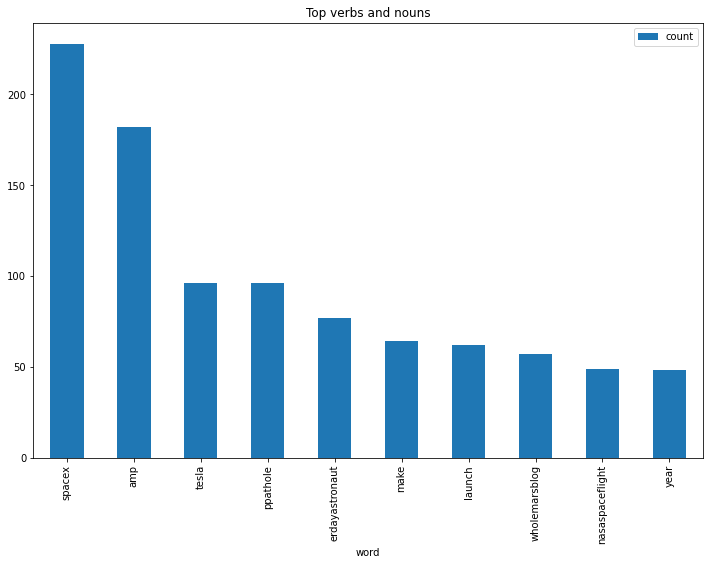

In [62]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## Emotion Mining - Sentiment Analysis

In [65]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [67]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [68]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [69]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [70]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [71]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [72]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [73]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
909    11
910    31
911     3
912    47
913    15
Name: word_count, Length: 914, dtype: int64

In [74]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the �poor inventor� card, but was ric...",-5,34
910,"It may never pay out, as the stock can�t b� ht...",-4,31
...,...,...,...
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven�t observed the� https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [75]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.374179
std        2.704916
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [78]:
# negative Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [79]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,7,109
17,Back to work I go � @CapybaraSurfer @MattWalla...,4,39
...,...,...,...
901,He was one of the very best.,3,7
903,"@Ali_Afshari In general, we need to improve ho...",4,87
905,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
907,This is both great &amp; terrifying.,3,6


In [80]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can�t b� ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

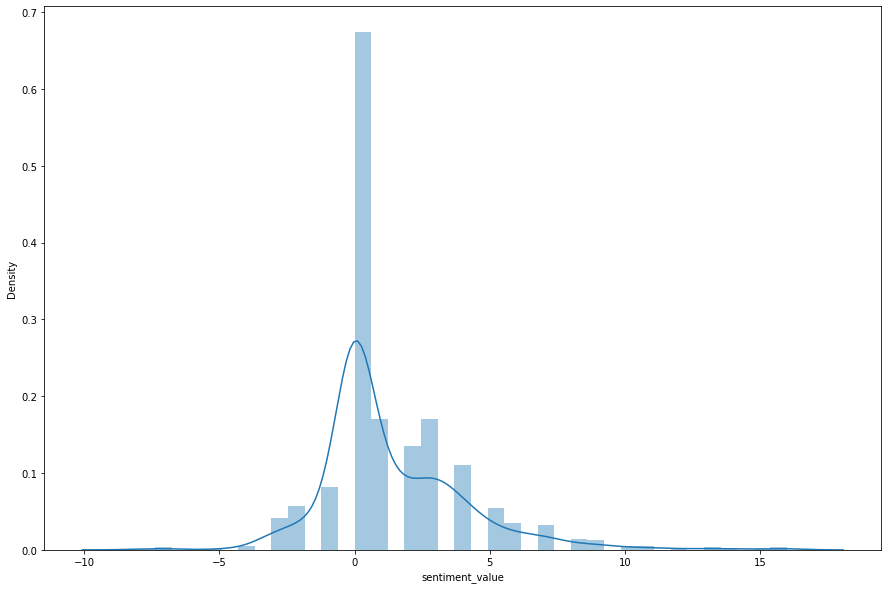

In [81]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

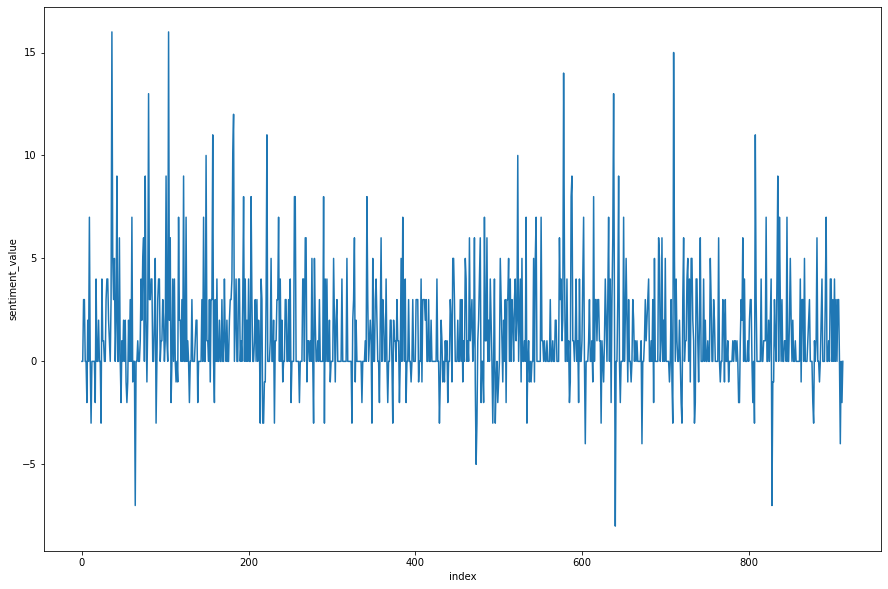

In [82]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)